# Day 17: Random Forests + Bagging 🌲🌲

In this lesson, we’ll cover:

1. What is **Bagging**?
2. How does **Random Forest** work?
3. Implementing Random Forest with `scikit-learn`
4. Comparing performance with a Decision Tree


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


## 1. Bagging (Bootstrap Aggregation)

- Bagging = **Bootstrap Sampling + Aggregation**
- Multiple models are trained on different random subsets of the data.
- Their predictions are combined (majority voting for classification, averaging for regression).
- Helps reduce **variance** and prevent overfitting.


## 2. Random Forest 🌲

- A **Random Forest** is an ensemble of Decision Trees.
- Each tree is trained on:
  - A **random sample** of the data (with replacement).
  - A **random subset of features**.
- Final prediction = **majority vote** (classification) or **average** (regression).


In [2]:
# Load dataset (Iris for demo)
from sklearn.datasets import load_iris
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 3. Train a Decision Tree vs Random Forest


In [3]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


## 4. Model Evaluation


In [4]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


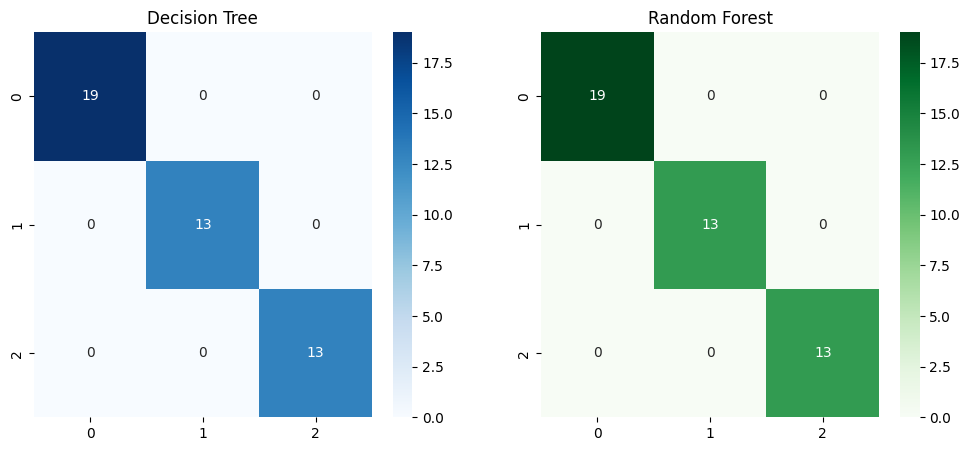

In [5]:
# Confusion Matrix comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest")

plt.show()


## 5. Feature Importance


C:\Users\keyur\AppData\Local\Temp\ipykernel_5096\2649234682.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


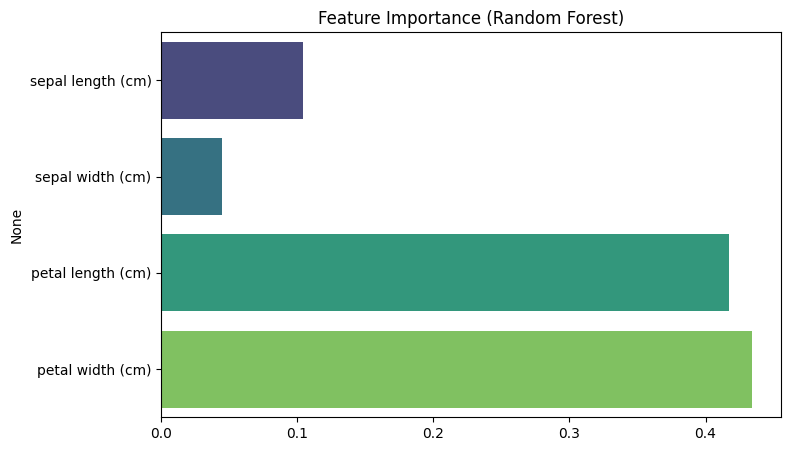

In [6]:
# Feature importance from Random Forest
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()


### 🔑 Key Takeaways
- Bagging reduces variance by combining multiple weak learners.
- Random Forest introduces randomness in data **and features**.
- Random Forest usually outperforms a single Decision Tree.
- Feature importance helps us understand which variables matter most.
